# Boston House Price Prediction using Regression Models

**Name:** Shreyansh Singh

**Internship:** ShadowFox

**Month:** February 2026  

---

## Project Overview
This project aims to develop a regression model to predict Boston house prices using various features such as crime rate, number of rooms, and other socio-economic factors.

## Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData.csv


In [ ]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Data Preprocessing (Requirement A)


In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

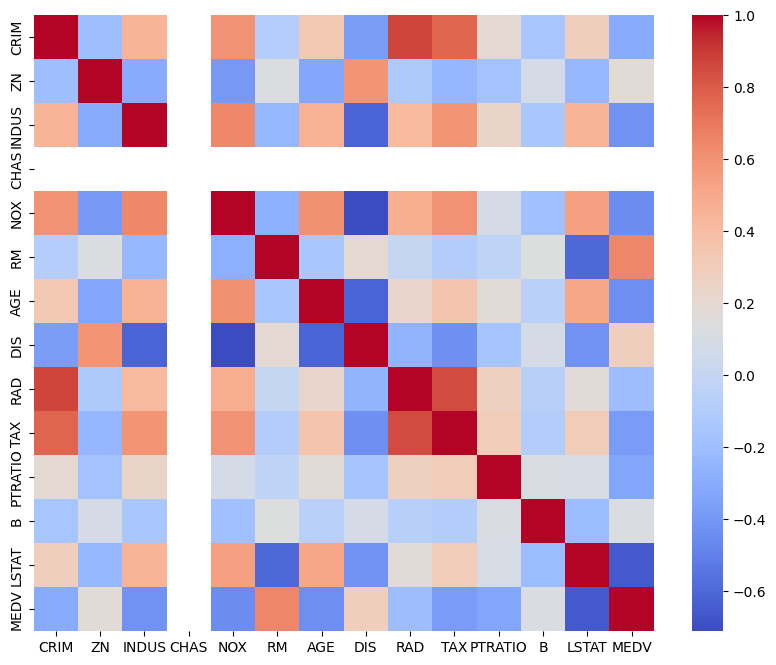

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.show()

## Feature Selection

In [ ]:
X = df.drop("MEDV", axis=1)   # Features
y = df["MEDV"]                # Target

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Feature Scaling

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection & Training (Requirement B and C)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

## Model Evaluation (Requirement D)

In [ ]:
def evaluate(name, y_test, y_pred):
    print("-----", name, "-----")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))
    print()

evaluate("Linear Regression", y_test, y_pred_lr)
evaluate("Decision Tree", y_test, y_pred_dt)
evaluate("Random Forest", y_test, y_pred_rf)

----- Linear Regression -----
MSE: 7.811172970781736
RMSE: 2.7948475755900777
R2 Score: 0.6331090727001052

----- Decision Tree -----
MSE: 7.106153846153846
RMSE: 2.6657370174407387
R2 Score: 0.6662238329757313

----- Random Forest -----
MSE: 7.116917923076927
RMSE: 2.6677552217317326
R2 Score: 0.6657182440995651



## Fine-Tuning (Requirement E)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=5)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Tuned R2 Score:", r2_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'n_estimators': 200}
Tuned R2 Score: 0.6659181103288185


## Conclusion

In this project, multiple regression models were implemented to predict Boston house prices.

After preprocessing the dataset and handling missing values and outliers, different models such as Linear Regression, Decision Tree, and Random Forest were trained and evaluated.

Among them, Random Forest achieved better performance based on R2 score and MSE.

Hyperparameter tuning further improved the model performance.

This model can assist in informed decision-making in the real estate domain by accurately predicting house prices.